# 2Dpose exercises
* 1.a) find $\textbf{p} = \begin{bmatrix} x\\ y \end{bmatrix}$ from the diagram on exercise pdf.

In [1]:
import numpy as np

$
^O\textbf{p}_1 = \begin{bmatrix} 1 \\ 3 \end{bmatrix} \text{ , } ^O\textbf{p}_2 = \begin{bmatrix} 4 \\ 2 \end{bmatrix} \\
^A\textbf{p}_1 = \begin{bmatrix} 0 \\ 2 \end{bmatrix}  \text{ , } ^A\textbf{p}_2 = \begin{bmatrix} 3 \\ 1 \end{bmatrix}\\
^B\textbf{p}_1 = \begin{bmatrix} 0 \\ \sqrt{2} \end{bmatrix}  \text{ , } ^B\textbf{p}_2 = \begin{bmatrix} 2\sqrt{2} \\ 0 \end{bmatrix}\\ 
^C\textbf{p}_1 = \begin{bmatrix} 3 \\ -2 \end{bmatrix}  \text{ , } ^C\textbf{p}_2 = \begin{bmatrix} 0 \\ -1 \end{bmatrix} \\
$

In [2]:
#P written in python
Op1 = np.array([[1],[3]])
Op2 = np.array([[4],[2]])
Ap1 = np.array([[0],[2]])
Ap2 = np.array([[3],[1]])
Bp1 = np.array([[0],[-np.sqrt(2)]])
Bp2 = np.array([[2*np.sqrt(2)],[0]])
Cp1 = np.array([[3],[-2]])
Cp2 = np.array([[0],[-1]])

* 1.b) find the rotation matrix 
$^{from}T_{to} = \begin{bmatrix} 
cos\theta & -sin\theta\\
sin\theta & cos\theta
\end{bmatrix}$

In [3]:
#Rotation matrix function
def rotMat(theta):
    theta = np.radians(theta)
    R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    return R

#Extended vector function
def exVector(vec):
    row = 0
    return np.append(vec,np.array([[1]]), axis=row)

#Transformation matrix function
def transMat(theta,vector):
    #defining variables
    row = 0
    coloumn = 1
    zeroRow = np.array([[0,0]])
    R = rotMat(theta)
    vec = exVector(vector)
    exMat = np.append(R,zeroRow,axis=row)
    T = np.append(exMat,vec,axis=coloumn)
    return T.round(3)

In [4]:
thetA = 0
OvA = np.array([[1],[1]])
OTA = transMat(thetA,OvA)
OTA

array([[ 1., -0.,  1.],
       [ 0.,  1.,  1.],
       [ 0.,  0.,  1.]])

In [5]:
thetB = -np.pi/4
OvB = np.array([[2],[4]])
OTB = transMat(thetB,OvB)
OTB

array([[ 1.   ,  0.014,  2.   ],
       [-0.014,  1.   ,  4.   ],
       [ 0.   ,  0.   ,  1.   ]])

In [6]:
thetC = np.pi
OvC = np.array([[4],[1]])
OTC = transMat(thetC,OvC)
OTC

array([[ 0.998, -0.055,  4.   ],
       [ 0.055,  0.998,  1.   ],
       [ 0.   ,  0.   ,  1.   ]])

* 1.c)

In [7]:
BthetaC = -(3*np.pi)/4
BvC = np.array([[(5*np.sqrt(2))/2],[-np.sqrt(2)/2]])
BTC = transMat(BthetaC, BvC)
BTC

array([[ 0.999,  0.041,  3.536],
       [-0.041,  0.999, -0.707],
       [ 0.   ,  0.   ,  1.   ]])

In [8]:
CthetaA = np.pi
CvA = np.array([[3],[0]])
CTA = transMat(CthetaA,CvA)
CTA

array([[ 0.998, -0.055,  3.   ],
       [ 0.055,  0.998,  0.   ],
       [ 0.   ,  0.   ,  1.   ]])

In [9]:
AthetaB = -np.pi/4
AvB = np.array([[1],[3]])
ATB = transMat(AthetaB, AvB)
ATB

array([[ 1.   ,  0.014,  1.   ],
       [-0.014,  1.   ,  3.   ],
       [ 0.   ,  0.   ,  1.   ]])

* 1.d) Use the obtained transform matrices to determin the position vectors

$$^{A}\overset{\sim}{p} = ^{B}T_A ^{B}\overset{\sim}{p} = (^{A}T_B)^{-1} \text{ } ^{B}\overset{\sim}{p} $$

In [10]:
OTAinv = np.linalg.inv(OTA)
Op = exVector(Op1)
Ap = np.delete(OTAinv.dot(Op),2,axis=0)
Ap

array([[0.],
       [2.]])

In [11]:
OTBinv = np.linalg.inv(OTB)
Bp = np.delete(OTBinv.dot(Op),2,axis=0)
Bp.round(3)

array([[-0.986],
       [-1.014]])

In [12]:
OTCinv = np.linalg.inv(OTC)
Cp = np.delete(OTCinv.dot(Op),2,axis=0)
Cp

array([[-2.88680309],
       [ 2.16310037]])

In [13]:
Op2ex = exVector(Op2)
Ap_2 = np.delete(OTAinv.dot(Op2ex),2,axis=0)
Ap_2

array([[3.],
       [1.]])

In [14]:
Bp_2 = np.delete(OTBinv.dot(Op2ex),2,axis=0)
Bp_2.round(3) #e^-16 = 0

array([[ 2.028],
       [-1.972]])

In [15]:
Cp_2 = np.delete(OTCinv.dot(Op2ex),2,axis=0)
Cp_2

array([[0.05505346],
       [0.99897   ]])

## 2 Determine if a matrix is a valid rotation matrix

$det(R) = 1$ and $R^TR = I$

In [16]:
def validRot(R):
    detR = np.linalg.det(R)
    rtr = np.linalg.inv(R).dot(R)
    if (round(detR) == round(sum(rtr[0])) == round(sum(rtr[1])) == 1):
        print("This is a valid rotation matrix, see for your self!")
        print(f"det(R) = {detR} and I rounded it up to be {round(detR)}")
        print(f"Matrix = \n{rtr}\nI rounded first row to be {round(sum(rtr[0]))}\nand second {round(sum(rtr[0]))}")
    else:
        print("This matrix is not a valid rotation matrix")

* 2a)

$R = \begin{bmatrix} 0.995 & -0.0998\\ 0.0998 & 0.995 \end{bmatrix}$

In [17]:
R = np.array([[0.995, -0.0998],[0.0998, 0.995]])
validRot(R)

This is a valid rotation matrix, see for your self!
det(R) = 0.9999850399999999 and I rounded it up to be 1
Matrix = 
[[ 1.00000000e+00 -2.24732008e-18]
 [ 1.79944683e-18  1.00000000e+00]]
I rounded first row to be 1
and second 1


* 2b) = 2e)

$R = \begin{bmatrix} 1 & 0\\ 0 & 1 \end{bmatrix}$

In [18]:
R = np.array([[1,0],[0,1]])
validRot(R)

This is a valid rotation matrix, see for your self!
det(R) = 1.0 and I rounded it up to be 1
Matrix = 
[[1. 0.]
 [0. 1.]]
I rounded first row to be 1
and second 1


* 2c)

$R = \begin{bmatrix} 1 & 0\\ 0 & -1 \end{bmatrix}$

In [19]:
R = np.array([[1,0],[0,-1]])
validRot(R)

This matrix is not a valid rotation matrix


* 2d)

$R = \begin{bmatrix} 1 & 1\\ 0 & 2 \end{bmatrix}$

In [20]:
R = np.array([[1,1],[0,2]])
validRot(R)

This matrix is not a valid rotation matrix


* 2f) = 2g)

$R = \begin{bmatrix} \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2}\\ \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \end{bmatrix}$

In [21]:
R = np.array([[np.sqrt(2)/2,-np.sqrt(2)/2],[np.sqrt(2)/2,np.sqrt(2)/2]])
validRot(R)

This is a valid rotation matrix, see for your self!
det(R) = 1.0 and I rounded it up to be 1
Matrix = 
[[ 1.00000000e+00 -1.01465364e-17]
 [-1.01465364e-17  1.00000000e+00]]
I rounded first row to be 1
and second 1


* 2h)

$R = \begin{bmatrix} -0.5 & -0.866\\ 0.866 & -0.5 \end{bmatrix}$

In [22]:
R = np.array([[-0.5,-0.866],[0.866,-0.5]])
validRot(R)

This is a valid rotation matrix, see for your self!
det(R) = 0.999956 and I rounded it up to be 1
Matrix = 
[[1.00000000e+00 5.55111512e-17]
 [2.64234839e-17 1.00000000e+00]]
I rounded first row to be 1
and second 1


* 2i)

$R = \begin{bmatrix} -0.5 & -0.866\\ 0.866 & 0.5 \end{bmatrix}$

In [23]:
R = np.array([[-0.5,-0.866],[0.866,0.5]])
validRot(R)

This matrix is not a valid rotation matrix


## 3 Consider the rotation matrix 
$R(\theta) = \begin{bmatrix} 
cos(\theta) &  -sin(\theta)\\
sin(\theta) & cos(\theta) \end{bmatrix}$

* 3.a) Show that $R(0) = I_2$

$R(0) = \begin{bmatrix} 
cos(0) &  -sin(0)\\
sin(0) & cos(0) \end{bmatrix} =
\begin{bmatrix} 
1 &  0\\
0 & 1 \end{bmatrix} = I_2$

* 3.b) Show that for any angle $\theta$ $det(R(\theta)) = +1$

If $A = \begin{bmatrix}a & b\\ c & d \end{bmatrix}$
then $det(A) = \begin{vmatrix}a & b\\ c & d  \end{vmatrix} = ad - bc $

And we know from trigonometry that $cos^2 + sin^2 = 1$

Therfore $det(R) = \begin{vmatrix}cos(\theta) & -sin(\theta)\\ sin(\theta) & cos(\theta)  \end{vmatrix} 
= cos^2(\theta) + sin^2(\theta) = 1 $

* 3.c) Show that $R^TR = I_2$

$R^T = \begin{bmatrix} cos(\theta) & sin(\theta)\\-sin(\theta) & cos(\theta)\end{bmatrix}$

$R^TR = \begin{bmatrix} cos(\theta) & sin(\theta)\\-sin(\theta) & cos(\theta)\end{bmatrix}
\begin{bmatrix} cos(\theta) & -sin(\theta)\\sin(\theta) & cos(\theta)\end{bmatrix} = 
\begin{bmatrix} cos^2(\theta) + sin^2(\theta) & -cos(\theta)sin(\theta) + cos(\theta)sin(\theta) \\ -cos(\theta)sin(\theta) + cos(\theta)sin(\theta) & sin^2(\theta)+cos^2(\theta)\end{bmatrix} = \begin{bmatrix} 1 & 0\\ 0 & 1\end{bmatrix} = I_2$

* 3.d) Show that $R(-\theta) = R(\theta)^T$

To show this we need to know some simple trigonometry:
$$ cos(-\theta) = cos(\theta)$$ $$ sin(-\theta) = -sin(\theta) $$
And if we have a 2x2 matrix A:
$$A = \begin{bmatrix} a & b\\ c & d \end{bmatrix} $$
The transpose of A would be 
$$A^T = \begin{bmatrix} a & -c\\ -b & d \end{bmatrix} $$
Whith this knowledge we kan start calculating:

$R(-\theta) =  \begin{bmatrix} 
cos(-\theta) & -sin(-\theta)\\ sin(-\theta) & cos(-\theta) \end{bmatrix} =
\begin{bmatrix} 
cos(\theta) & sin(\theta)\\ -sin(\theta) & cos(\theta) \end{bmatrix} = R(\theta)^T
$

* 3.e) Show that R(a)R(b) = R(a+b)

To show this we need to know some advanced trigonometry formulas:

$$cos(a\pm b) = cos(a)cos(b) \mp sin(a)sin(b)$$
$$sin(a \pm b) = sin(a)cos(b) \pm sin(b)cos(a) $$

$R(a)R(b) = 
\begin{bmatrix} cos(a) & -sin(a) \\ sin(a) & cos(a) \end{bmatrix}
\begin{bmatrix} cos(b) & -sin(b) \\ sin(b) & cos(b) \end{bmatrix} =
\begin{bmatrix} cos(a)cos(b) -sin(a)sin(b) & -(sin(a)cos(b)+sin(b)cos(a)) \\ 
sin(a)cos(b)+sin(b)cos(a) & cos(a)cos(b) -sin(a)sin(b) \end{bmatrix}
$

And with the trigonometric formulas above we can se that we can write it like:

$R(a)R(b)= \begin{bmatrix} cos(a+b) & -sin(a+b) \\ sin(a+b) & cos(a+b) \end{bmatrix} = R(a+b) $

* 3.f) Show that the coloumns of $R(\theta)$ is orthonormal

The definition of orthonormality for two vectors is:
If two vectors are ortogonal and both have unit length, the vectors are orthonormal.

So lets start by dividing $R(\theta)$ into two vectors:

$R(\theta) = \begin{bmatrix} 
cos(\theta) & -sin(\theta)\\ 
sin(\theta) & cos(\theta)
\end{bmatrix} = \begin{bmatrix}\textbf{a} & \textbf{b} \end{bmatrix}$

If two vectors are ortogonal the dot product between them is zero

$\textbf{a}\cdot\textbf{b} = \textbf{a}^T\textbf{b} = 
\begin{bmatrix} cos(\theta) & sin(\theta) \end{bmatrix}
\begin{bmatrix} -sin(\theta)\\ cos(\theta) \end{bmatrix} =
-cos(\theta)sin(\theta) +cos(\theta)sin(\theta) = 0
$

Next step is to find if $\textbf{a}$ and $\textbf{b}$ both have unit lenght:
$$||\textbf{a}|| = ||\textbf{a}^T\textbf{a}|| = \sqrt{ a_1^2 + a_2^2 } = 1$$

$||\textbf{a}|| = ||\textbf{a}^T\textbf{a}|| = \sqrt{cos^2(\theta) + sin^2(\theta)} = \sqrt{1}=1\\
||\textbf{b}|| = ||\textbf{b}^T\textbf{b}|| = \sqrt{cos^2(\theta) + sin^2(\theta)} = \sqrt{1}=1$

As shown above $\textbf{a}$ and $\textbf{b}$ both have unit length and the dot product between them is zero. This corresponds to the definition of orthonormality stated above, this means that $\textbf{a}$ and $\textbf{b}$ are orthonormal vectors.

* 3.g) Show that the rows of $R(\theta)$ is orthonormal

The rows of $R(\theta)$ is:

$\textbf{r}_1 = \begin{bmatrix} cos(\theta) & -sin(\theta) \end{bmatrix}\\
\textbf{r}_2 = \begin{bmatrix} sin(\theta) & cos(\theta) \end{bmatrix}
$

$
||\textbf{r}_1|| = ||\textbf{r}_1\textbf{r}_1^T|| = 
||\begin{bmatrix} cos(\theta) & -sin(\theta) \end{bmatrix}\begin{bmatrix} cos(\theta) \\ -sin(\theta) \end{bmatrix}|| = \sqrt{cos^2(\theta) + sin^2(\theta)} = \sqrt{1}=1
$

$
||\textbf{r}_2|| = ||\textbf{r}_2\textbf{r}_2^T|| = 
||\begin{bmatrix} sin(\theta) & cos(\theta) \end{bmatrix}\begin{bmatrix} sin(\theta) \\ cos(\theta) \end{bmatrix}|| = \sqrt{sin^2(\theta) + cos^2(\theta)} = \sqrt{1}=1
$

## 4 Consider the transform matrix
$$T_1 = \begin{bmatrix} R_1 & t_1\\ 0_{1x2} & 1  \end{bmatrix} \text{ , } T_2 = \begin{bmatrix} R_2 & t_2\\ 0_{1x2} & 1  \end{bmatrix}$$
Where 
$$t_1 =\begin{bmatrix} x_1 \\ y_1 \end{bmatrix} \text{ , }t_2 =\begin{bmatrix} x_2 \\ y_2 \end{bmatrix}
\text{ and } 0_{1x2} = \begin{bmatrix} 0 & 0 \end{bmatrix}
$$
Show that 
$$T_1T_2 = \begin{bmatrix} R_1R_2 & t_1+R_1t_2\\ 0_{1x2} & 1  \end{bmatrix}$$

$T_1T_2 =  \begin{bmatrix} R_1 & t_1\\ 0_{1x2} & 1  \end{bmatrix}\begin{bmatrix} R_2 & t_2\\ 0_{1x2} & 1  \end{bmatrix} = \begin{bmatrix} R_1R_2 + t_10_{1x2} & R_1t_2+t_1\\ 0_{1x2}R_2 + 0_{1x2} &0_{1x2}t_2 +1  \end{bmatrix}$

From here we can show that

$
0_{1x2}t_1 = \begin{bmatrix}0 & 0 \end{bmatrix}\begin{bmatrix}x_1\\x_2 \end{bmatrix} = 0 + 0 = 0
$

Also for $0_{1x2}R_1 = 0$

With this we can rewrite the matrix to

$T_1T_2 = \begin{bmatrix} R_1R_2 & t_1+R_1t_2\\ 0_{1x2} & 1  \end{bmatrix}$

## Excercise 5

Show that $T^{-1} = \begin{bmatrix} R^T &  -R^Tt \\ 0_{1x2} & 1 \end{bmatrix}$ is the inverse from 
$T = \begin{bmatrix} R &  t \\ 0_{1x2} & 1 \end{bmatrix}$ 

HINT: Show that $TT^{-1} = I_3$

$TT^{-1} = \begin{bmatrix} R &  t \\ 0_{1x2} & 1 \end{bmatrix}\begin{bmatrix} R^T &  -R^Tt \\ 0_{1x2} & 1 \end{bmatrix} = \begin{bmatrix} RR^T + t0_{1x2} &  -RR^Tt + t \\ 0_{1x2}R^T + 0_{1x2}  & -R^Tt0_{1x2}+ 1 \end{bmatrix}$

Before I can go any further I need to show some of my calculation

$RR^T = \begin{bmatrix} cos(\theta) & -sin(\theta) \\ sin(\theta) & cos(\theta)\end{bmatrix}
\begin{bmatrix} cos(\theta) & sin(\theta) \\ -sin(\theta) & cos(\theta)\end{bmatrix} = 
\begin{bmatrix} cos^2(\theta) + sin^2(\theta) &  sin(\theta)cos(\theta) - sin(\theta)cos(\theta) \\ sin(\theta)cos(\theta) - sin(\theta)cos(\theta) & cos^2(\theta) + sin^2(\theta)\end{bmatrix} = 
\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} = I_2$

Multiplying something with an identity matrix is the same as multiplying with one, and if you multiply something with $0_{1x2}$ you get [0 0] back

This means that :

$TT^{-1} = 
\begin{bmatrix} RR^T + t0_{1x2} &  -RR^Tt + t \\ 0_{1x2}R^T + 0_{1x2} & -R^Tt0_{1x2}+ 1 \end{bmatrix} = \begin{bmatrix} I_2 &  -t + t \\ 0_{1x2}  & 1 \end{bmatrix} = 
\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0\\ 0 & 0 & 1 \end{bmatrix} = I_3$

because 

$t-t = \begin{bmatrix} x \\ y\end{bmatrix}-\begin{bmatrix} x \\ y\end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$

$0_{1x2} = \begin{bmatrix} 0 & 0\end{bmatrix}$

## Excercise 6
* 6a)

In [24]:
tw= np.array([[3],[1]]) #avstands vektor fra B til W
thetaW = -20
tt = np.array([[5],[4]]) #avstands vektor fra B til T
thetaT = 10

BTW = transMat(thetaW,tw).round(3)
BTW

array([[ 0.94 ,  0.342,  3.   ],
       [-0.342,  0.94 ,  1.   ],
       [ 0.   ,  0.   ,  1.   ]])

In [25]:
BTT = transMat(thetaT,tt).round(3)
BTT

array([[ 0.985, -0.174,  5.   ],
       [ 0.174,  0.985,  4.   ],
       [ 0.   ,  0.   ,  1.   ]])

* 6b) Using $^BT_W$, $^BT_T$ determine $^WT_T$

To do this I will write down some formulas that I'm going to use:

$\ominus ^AT_B = ^BT_A$

$^BT_A\oplus ^AT_C = ^BT_C$

With this formulas I can derive to the correct equation before i compute

$(^BT_W)^{-1}\oplus ^BT_T = ^WT_T$

In [26]:
WTB = np.linalg.inv(BTW)
WTT = WTB.dot(BTT).round(3)
WTT

array([[ 0.866, -0.5  ,  0.854],
       [ 0.5  ,  0.866,  3.502],
       [ 0.   ,  0.   ,  1.   ]])

* 6c) Determine the coordinates of the point $p$ in frame ${W}$ denoted $^Wp$

In [27]:
Wp = np.array([[3],[2]])
Wp

array([[3],
       [2]])

* 6d) Find $^Bp$ using $^BT_W$

In [28]:
Wpex = exVector(Wp)
Bp = BTW.dot(Wpex)
Bp

array([[6.504],
       [1.854],
       [1.   ]])

## RADAR target localization 

In [29]:
import robotteknikk as rob
import matplotlib.pyplot as plt

### Exercise 1.a-c)
* a) Ship positioning
* b) Ship heading
* c) Relativ target position measurments

In [30]:
#Sets figure size
width = 10
height = 8
plt.rcParams['figure.figsize'] = [width, height] 

In [31]:
M = np.genfromtxt('radar_data.csv', delimiter=",")
N = M.shape[0]

OxS = M[:,0] # x coordinate from origo to ship
OyS = M[:,1] # y coordinate from origo to ship
theta = np.radians(M[:,2]) # convert to radians
SxT = M[:,3] # x coordinate from ship to target
SyT = M[:,4] # y coordinate from ship to target

OpS = np.array([OxS, OyS]).T #position vector fram O to Ship
SpT = np.array([SxT, SyT]).T #position vector from Ship to target

Text(0.5, 0.98, 'Ship movements')

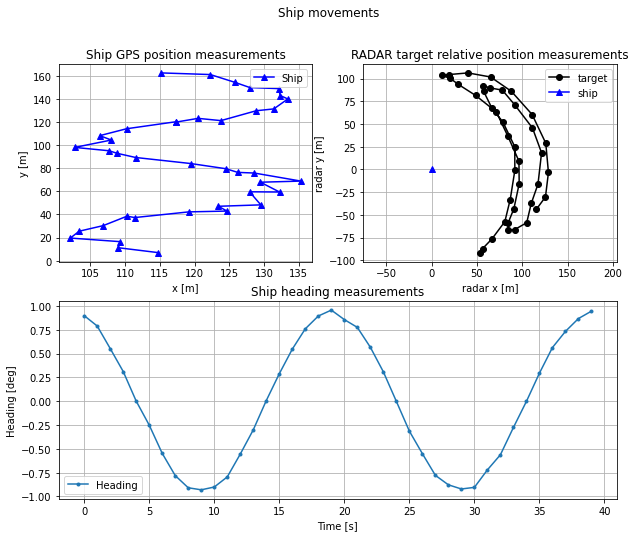

In [32]:
### a) ###
fig1 = plt.figure()
ax = fig1.add_subplot(2,2,1)
ax.plot(OpS[:,0],OpS[:,1],'b^-', label = 'Ship')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('Ship GPS position measurements')
ax.legend()
ax.grid()

### c ###
ax2 = fig1.add_subplot(2,2,2)
ax2.plot(SpT[:,0],SpT[:,1],'ko-', label = 'target')
ax2.plot(0,0,'b^-', label = 'ship')
ax2.set_xlabel('radar x [m]')
ax2.set_ylabel('radar y [m]')
ax2.legend()
ax2.set_title('RADAR target relative position measurements')
ax2.grid()
ax2.axis('equal')

### b ###
ax3 = fig1.add_subplot(2,1,2)
ax3.plot(theta,'.-',label='Heading')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Heading [deg]')
ax3.legend()
ax3.set_title('Ship heading measurements')
ax3.grid()

plt.suptitle("Ship movements")

In [33]:
OpT = np.zeros((N,2))

for i in range(N):
    OpT[i] = rotMat(np.degrees(theta[i])).dot(SpT[i])+OpS[i]

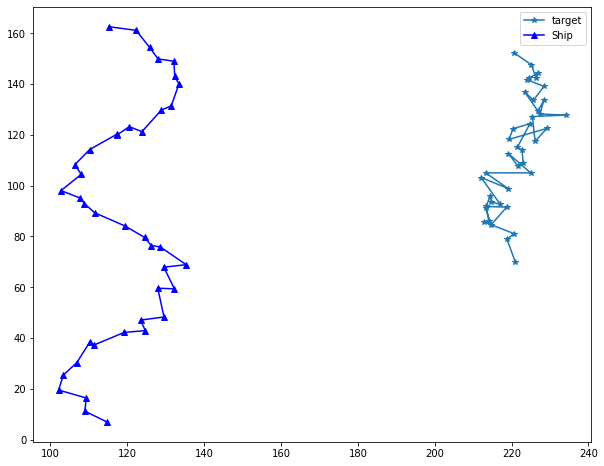

In [34]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(OpT[:,0],OpT[:,1], '*-', label = 'target')
ax.plot(OpS[:,0],OpS[:,1],'b^-', label = 'Ship')
ax.legend()